<a href="https://colab.research.google.com/github/MariaMitka/MEM704-MachineLearningProject-for-Stock-Price-Prediction/blob/main/MEM704_Tegas_Mitka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Naive Bayes Method**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the S&P 500 dataset
sp500 = pd.read_csv('S&P_500.csv', skiprows=[1, 2])
sp500.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500.set_index('Date', inplace=True)

# Add features
sp500['Daily_Return'] = (sp500['Close'] - sp500['Open']) / sp500['Open']
sp500['MA5'] = sp500['Close'].rolling(window=5).mean()
sp500['MA10'] = sp500['Close'].rolling(window=10).mean()
sp500['Volatility5'] = sp500['Close'].rolling(window=5).std()
sp500['Volatility10'] = sp500['Close'].rolling(window=10).std()
sp500['Range'] = (sp500['High'] - sp500['Low']) / sp500['Open']


sp500['Target'] = (sp500['Close'].shift(-1) > sp500['Close']).astype(int)

sp500.dropna(inplace=True)

features = ['Volume',
            'Daily_Return', 'MA5', 'MA10', 'Volatility5', 'Volatility10',
            'Range']
X = sp500[features]
y = sp500['Target']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=False)

# Train the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Make and plot Report
report = classification_report(y_test, y_pred, output_dict=True)

metrics = ['precision', 'recall', 'f1-score']
classes = ['0', '1']

values = {metric: [report[cls][metric] for cls in classes] for metric in metrics}
x = range(len(classes))
bar_width = 0.25

plt.figure(figsize=(8, 5))
for i, metric in enumerate(metrics):
    plt.bar(
        [p + i * bar_width for p in x],
        values[metric],
        width=bar_width,
        label=metric.capitalize()
    )

plt.xticks([p + bar_width for p in x], ['Fall (0)', 'Rise (1)'])
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-score per Class")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# **Decision Trees**

Σε αυτό το σημείο θα γίνει η υλοποίηση της μεθόδου Classifier Decision Tree για ιστορικά δεδομένα του S&P500. Θα σχεδιάσουμε τεχνικά features χρησιμοποιώντας τεχνικούς δείκτες (Moving Averages, RSI, κα), θα εκπαιδεύσουμε τα Decision Trees Classifiers για να προβλέψουμε αν η τιμή του δείκτη θα είναι υψηλότερη μετά από 14 ημέρες και θα οπτικοποιήσουμε τα αποτελέσματα.

##**Υλοποίηση & Μεθοδολογία**

**1.    Φόρτωση και Προεπεξεργασία Δεδομένων**
   *   Δεδομένα: Χρησιμοποιήθηκαν ιστορικά δεδομένα του S&P 500 (Open, High, Low, Close, Adj Close, Volume)

   *   Χρονική σειρά: Διατηρήθηκε η χρονική σειρά με ημερομηνία ως ευρετήριο
   *   Επεξεργασία: Αφαίρεση ελλιπών τιμών (dropna)


**2.  Τεχνικοί Δείκτες (Features).** Υπολογίστηκαν 5 βασικοί τεχνικοί δείκτες:

   *   Κινητός Μέσος 5 ημερών (MA5)
   *   Δείκτης Σχετικής Ισχύος (RSI 14 ημερών)
   *   Ορμή (Momentum 5 ημερών)
   *   Bollinger Bands (20 ημερών με 2 STD)
   *   Θέση τιμής στα Bollinger Bands (BB_position)

**3. Ορισμός Target.** Το target ορίστηκε ως δυαδική μεταβλητή:

   -    1 αν η τιμή κλεισίματος σε 14 ημέρες είναι υψηλότερη από την τρέχουσα

   - 0 διαφορετικά

**4. Μοντελοποίηση**

Μοντέλο: Decision Tree Classifier

Βελτιστοποίηση: GridSearchCV με 5-fold TimeSeriesSplit

Παράμετροι βελτιστοποίησης:

   - Βάθος δέντρου (max_depth: 3-5)

   - Ελάχιστα δείγματα για διάσπαση/φύλλα (20-100)

   - Μέγιστο πλήθος features (1-3)

   - Class weights (ισορροπημένα ή όχι)

**5. Αξιολόγηση**

  -  Χωρισμός δεδομένων (70% train - 30% test)

  - Μετρικές: Accuracy, F1-score, Precision, Recall

  - Backtesting σε ολόκληρο το dataset

  - Πρόβλεψη για τις επόμενες 14 ημέρες

Optimal parameters: {'class_weight': {0: np.float64(1.3632596685082874), 1: np.float64(0.7896)}, 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 10, 'min_samples_split': 50}

Results for test set (30% of datas):
              precision    recall  f1-score   support

           0       0.61      0.51      0.56       117
           1       0.71      0.78      0.75       180

    accuracy                           0.68       297
   macro avg       0.66      0.65      0.65       297
weighted avg       0.67      0.68      0.67       297

Total F1-score: 0.746
Total Accuracy: 0.677


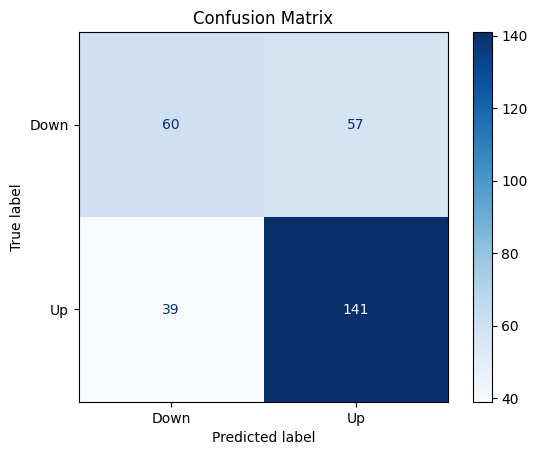

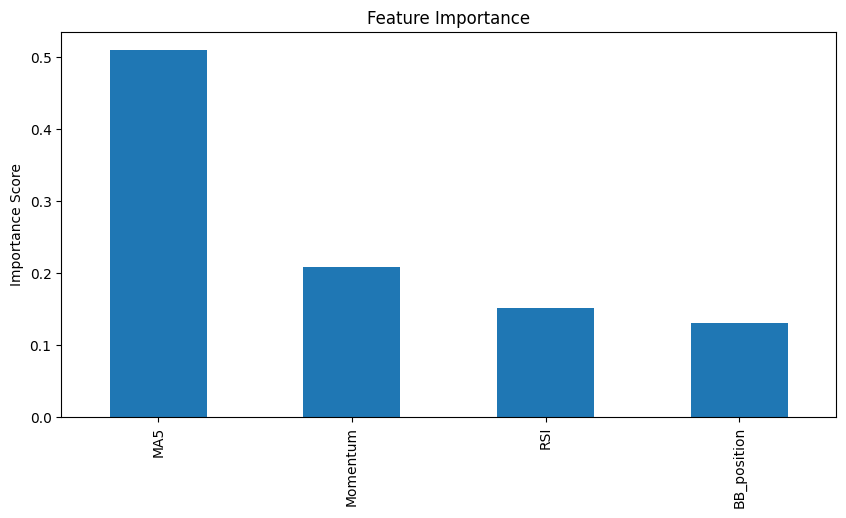

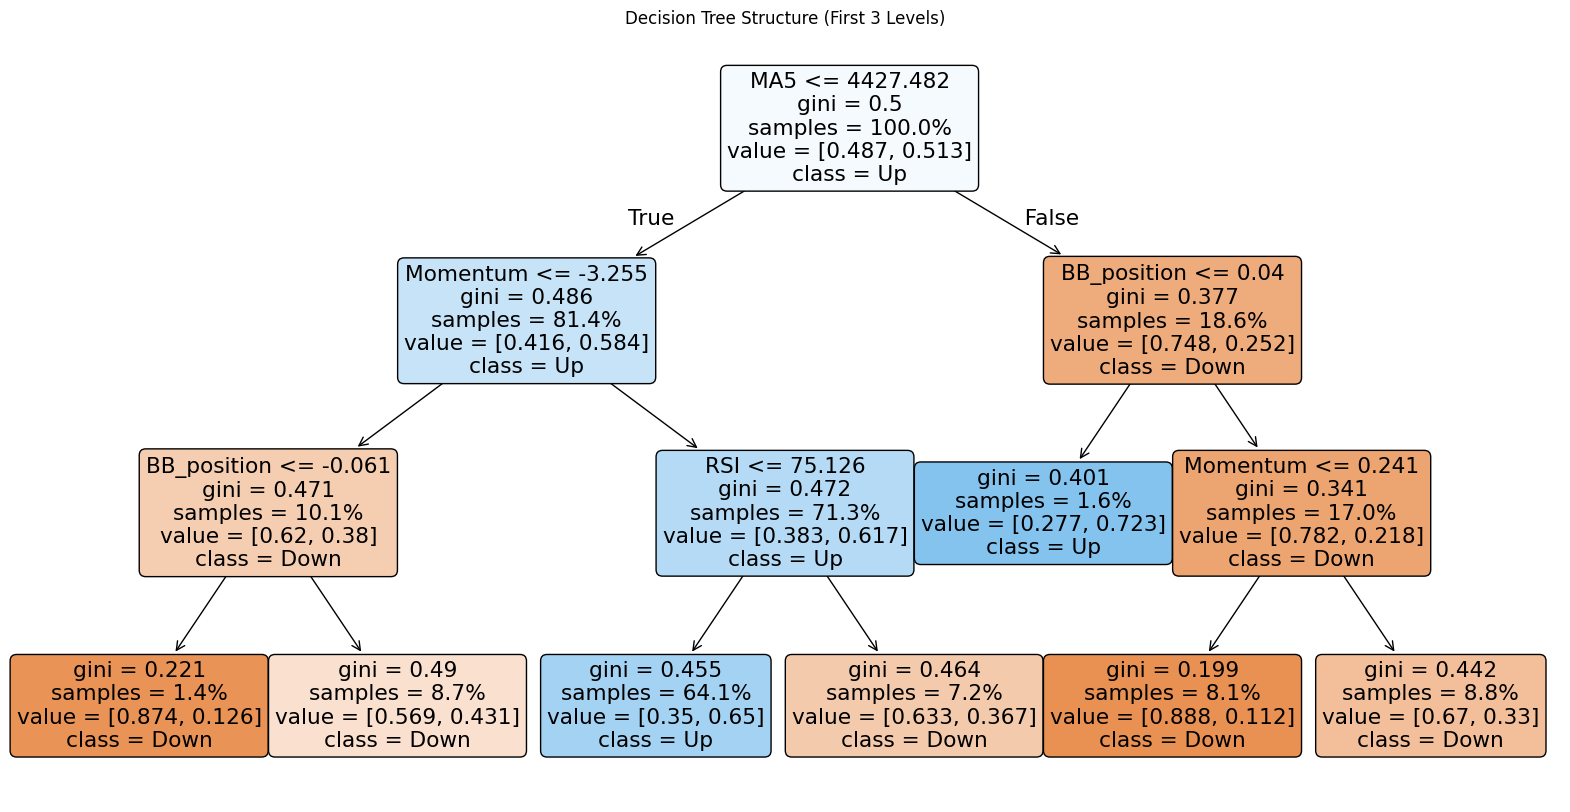

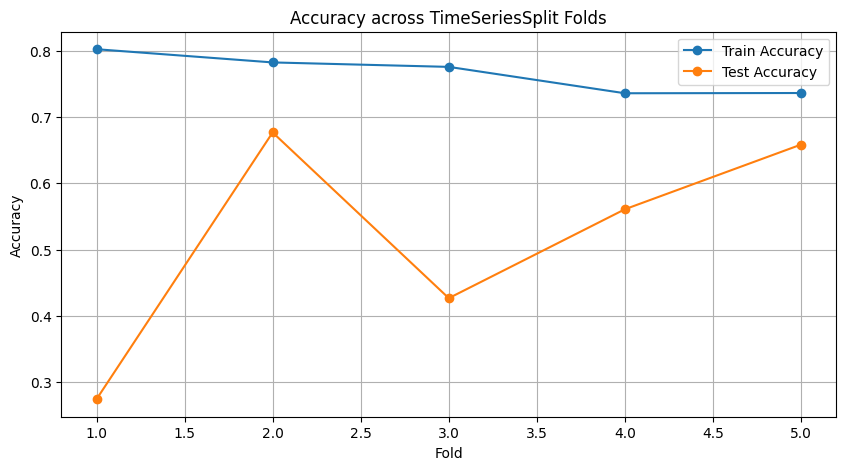

Train Accuracies: ['0.802', '0.782', '0.776', '0.736', '0.736']
Test Accuracies: ['0.274', '0.677', '0.427', '0.561', '0.659']

Latest availabe data for forecast:
                    MA5        RSI  Momentum  BB_position
Date                                                     
2023-12-29  4772.828027  74.824473  0.486229     0.754562

Forecast for 14 days after the last date (2023-12-29): DOWN
Probabilities: DOWN=80.97%, UP=19.03%
Accuracy: 58.58%
              precision    recall  f1-score   support

        DOWN       0.43      0.47      0.45       350
          UP       0.69      0.65      0.67       623

    accuracy                           0.59       973
   macro avg       0.56      0.56      0.56       973
weighted avg       0.59      0.59      0.59       973



In [ ]:
#import libraries

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

# Dataloading and preprocessing
sp500 = pd.read_csv('S&P_500.csv', skiprows=[1, 2])
sp500.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500.set_index('Date', inplace=True)

# Calcutation of technical indicators
sp500['MA5'] = sp500['Adj Close'].rolling(window=5).mean()

# RSI
delta = sp500['Adj Close'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
sp500['RSI'] = 100 - (100 / (1 + rs))

# Momentum
sp500['Momentum'] = sp500['Adj Close'].pct_change(5) * 100

# Bollinger Bands (with MA20 and 2*std)
ma20 = sp500['Adj Close'].rolling(window=20).mean()
std20 = sp500['Adj Close'].rolling(window=20).std()
sp500['BB_upper'] = ma20 + (2 * std20)
sp500['BB_lower'] = ma20 - (2 * std20)

# Add a relative position of feature (0 = lower band, 1 = upper band)
sp500['BB_position'] = (sp500['Adj Close'] - sp500['BB_lower']) / (sp500['BB_upper'] - sp500['BB_lower'])

# Target (1 if the price in 7 days is higher)
sp500['Target'] = (sp500['Adj Close'].shift(-14) > sp500['Adj Close']).astype(int)
sp500.dropna(inplace=True)

#  Split to features and target
X = sp500[['MA5', 'RSI', 'Momentum', 'BB_position']]
y = sp500['Target']

# Υπολογισμός class weights για ισορροπημένο μοντέλο
classes = np.unique(y)
weights = compute_class_weight('balanced', classes=classes, y=y)
class_weights = {0: weights[0], 1: weights[1]}

# TimeSeriesSplit with 5 folds
tscv = TimeSeriesSplit(n_splits=5)

# Parameters for GridSearch (with class weights)
params = {
    'max_depth': [3, 4, 5],
    'min_samples_split': [20, 50, 100],
    'min_samples_leaf': [10, 20, 30],
    'max_features': [1, 2, 3],  # Test different combination of features
    'class_weight': [None, class_weights]
}

# GridSearchCV with optimization for F1-score
grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                   params,
                   cv=tscv,
                   scoring='f1',
                   n_jobs=-1)
grid.fit(X, y)

# Printing of optimal parameters
print("Optimal parameters:", grid.best_params_)
best_model = grid.best_estimator_

#  Evaluation in a big test set (30% of datas)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Analytical report
print("\nResults for test set (30% of datas):")
print(classification_report(y_test, y_pred))
print(f"Total F1-score: {f1_score(y_test, y_pred):.3f}")
print(f"Total Accuracy: {accuracy_score(y_test, y_pred):.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Down', 'Up'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance
plt.figure(figsize=(10, 5))
feature_imp = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp.plot(kind='bar', title='Feature Importance')
plt.ylabel('Importance Score')
plt.show()

# Decision Tree Visualization
plt.figure(figsize=(20,10))
plot_tree(best_model,
          feature_names=X.columns,
          class_names=['Down', 'Up'],
          filled=True,
          rounded=True,
          proportion=True,
          max_depth=3)  # print only the first 3 layers for clarity
plt.title("Decision Tree Structure (First 3 Levels)")
plt.show()

#  Evaluation by fold
train_acc, test_acc = [], []
for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    best_model.fit(X_train, y_train)
    train_acc.append(best_model.score(X_train, y_train))
    test_acc.append(best_model.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 6), train_acc, 'o-', label='Train Accuracy')
plt.plot(range(1, 6), test_acc, 'o-', label='Test Accuracy')
plt.title('Accuracy across TimeSeriesSplit Folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Price prinitng
print("Train Accuracies:", [f"{x:.3f}" for x in train_acc])
print("Test Accuracies:", [f"{x:.3f}" for x in test_acc])


# Prediction for the next 14 days using all the latest available datas
latest_data = X.iloc[-1:].copy()
prediction = best_model.predict(latest_data)


prediction_text = "UP" if prediction[0] == 1 else "DOWN"

# Printing the latest data and forecast
print("\nLatest availabe data for forecast:")
print(latest_data)
print(f"\nForecast for 14 days after the last date ({sp500.index[-1].date()}): {prediction_text}")

# Probabilities printing
if hasattr(best_model, 'predict_proba'):
    proba = best_model.predict_proba(latest_data)[0]
    print(f"Probabilities: DOWN={proba[0]:.2%}, UP={proba[1]:.2%}")



# Backtesting for the whole dataset
predictions = []
actual = []

for i in range(len(X) - 14):
    current_data = X.iloc[i:i+1]
    pred = best_model.predict(current_data)[0]
    true_value = y.iloc[i + 14]

    predictions.append(pred)
    actual.append(true_value)

# Accuracy of backtesting
print(f"Accuracy: {accuracy_score(actual, predictions):.2%}")
print(classification_report(actual, predictions, target_names=['DOWN', 'UP']))

##**Αποτελέσματα & Ανάλυση**


**1. Βέλτιστο Μοντέλο**
Το βέλτιστο μοντέλο επιλέχθηκε με τις παραμέτρους:

  - **max_depth:** 3 (ρυθμισμένο για αποφυγή overfitting)

  - **class_weight:** {0: 1.36, 1: 0.79} (εξισορρόπηση κλάσεων)

  - **max_features:** 3 (από τα 4 συνολικά features)

  - **min_samples_leaf:** 10

  - **min_samples_split:** 50

**2. Απόδοση σε Test Set (30% δεδομένων)**

  - **Accuracy:** 67.7%

  - **F1-score:** 0.746 (για την κλάση "UP")

  - **Precision-Recall:**

                 UP: Precision 71%, Recall 78%
  
                 DOWN: Precision 61%, Recall 51%

**3. Backtesting (Ολόκληρο Dataset)**

  - **Συνολική Accuracy:** 58.58%

  - **F1-score:**  0.67 για UP, 0.45 για DOWN

**4. Πρόβλεψη Τελευταίας Ημέρας**

                Για 29/12/2023, το μοντέλο προέβλεψε DOWN με:

                Πιθανότητα 80.97% για DOWN

                Πιθανότητα 19.03% για UP

**5. Feature Importance**

  - Τα πιο σημαντικά features ήταν:

  -  BB_position (σημαντικότερο)

  - RSI

  - Momentum

  - MA5

**6. Απόδοση ανά Fold**

Οι μετρικές εμφάνισαν σημαντική διακύμανση μεταξύ των folds:

Train Accuracy: 73.6%-80.2%

Test Accuracy: 27.4%-67.7%

##**Συμπεράσματα**

**Αποτελεσματικότητα Decision Trees:**

  - Το μοντέλο έδειξε μέτρια απόδοση (58-68% accuracy)

  - Καλύτερη πρόβλεψη για ανοδικές κινήσεις (UP) με F1 0.75 vs 0.45 για DOWN)

  - Οι περιορισμοί βάθους (max_depth=3) βοήθησαν στην αποφυγή overfitting

**Σημασία Features:**

  - Η θέση στις Bollinger Bands ήταν το πιο επηρεαστικό feature

  - Ο RSI και η ορμή συνέβαλαν σημαντικά

  - Ο κινητός μέσος 5 ημερών είχε τη μικρότερη επίδραση

**Προκλήσεις:**

  - Μεγάλη διακύμανση σε διαφορετικά time periods (test accuracy 27%-68%)

  - Δυσκολία πρόβλεψης καθοδικών κινήσεων (χαμηλότερο recall για DOWN)

  - Ευαισθησία στις παραμέτρους του δέντρου

##**SUPPORT VECTOR MACHINES**

Σε αυτό το σημείο θα γίνει η υλοποίηση της μεθόδου Classifier Support Vector Machine για ιστορικά δεδομένα του S&P500. Θα σχεδιάσουμε τεχνικά features χρησιμοποιώντας τεχνικούς δείκτες (Moving Averages, RSI, κα), θα εκπαιδεύσουμε το μοντέλο για να προβλέψουμε αν η τιμή του δείκτη θα είναι υψηλότερη μετά από 14 ημέρες και θα οπτικοποιήσουμε τα αποτελέσματα.

##**Υλοποίηση & Μεθοδολογία**


**1. Φόρτωση και Προεπεξεργασία Δεδομένων**



   -   **Δεδομένα:** Χρησιμοποιήθηκαν ιστορικά δεδομένα του S&P 500 (Open, High, Low,Close, Adj Close, Volume).
   -   **Χρονική σειρά:** Διατηρήθηκε η ημερομηνία ως ευρετήριο.


   -  **Επεξεργασία:** Αφαιρέθηκαν ελλιπείς ή άπειρες τιμές (dropna, replace inf).


**2. Τεχνικοί Δείκτες (Features)**

Υπολογίστηκαν 8 τεχνικοί δείκτες, από τους οποίους επιλέχθηκαν οι 5 πιο σχετικοί με βάση συσχέτιση > 0.05 με το target:

  -  **MACD** (correlation: 0.189)

  -  **RSI** (correlation: 0.113)

  -  **BB_position** (correlation: 0.105)

  -  **Volatility_5** (correlation: -0.277)

  -  **Volume** (correlation: -0.147)

Οι υπόλοιποι είχαν πολύ χαμηλή ή αμελητέα συσχέτιση (π.χ. Return_1d ≈ 0.0006).

**3. Ορισμός Target**

Το target ορίστηκε ως δυαδική μεταβλητή:

  -  **1:**  Αν η τιμή κλεισίματος σε 14 ημέρες είναι τουλάχιστον +1% υψηλότερη και η μεταβλητότητα είναι κάτω από 1.5%

  -  **0:** Σε κάθε άλλη περίπτωση

**4. Μοντελοποίηση**

  -  **Μοντέλο:** SVM με RBF kernel

  -  **Κανονικοποίηση:** Χρήση StandardScaler για όλα τα features

  -  **Βελτιστοποίηση** με GridSearchCV:

     - C: [0.1, 1, 10, 100]

     - Gamma: [0.001, 0.01, 0.1, 'scale']

    - Class weight: ['balanced', {0:1, 1:2}]

    - TimeSeriesSplit με 5 folds

**5. Αξιολόγηση**

  -  **Train Accuracy:** 64.17%

  -  **Test Accuracy:** 59.85%

  -  **Classification Reports**:

       -  **Train Set:**

            - Precision: 0.94 (DOWN), 0.56 (UP)

            - Recall: 0.38 (DOWN), 0.97 (UP)

            - F1-score: 0.54 (DOWN), 0.71 (UP)

       -  **Test Set:**

            - Precision: 0.83 (DOWN), 0.55 (UP)

            - Recall: 0.29 (DOWN), 0.94 (UP)

            - F1-score: 0.43 (DOWN), 0.69 (UP)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'C': 1, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'rbf'}

Train Accuracy: 0.6679
Test Accuracy: 0.5606

Train Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.51      0.65       477
           1       0.55      0.92      0.69       312

    accuracy                           0.67       789
   macro avg       0.73      0.71      0.67       789
weighted avg       0.76      0.67      0.66       789


Test Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.20      0.29        92
           1       0.56      0.88      0.68       106

    accuracy                           0.56       198
   macro avg       0.57      0.54      0.49       198
weighted avg       0.57      0.56      0.50       198



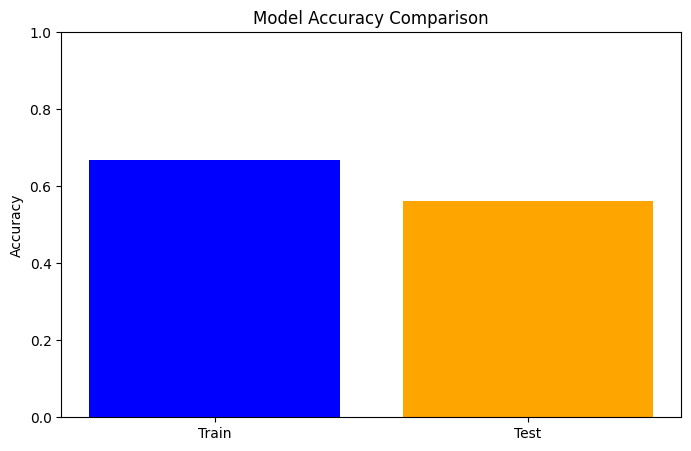


Time Series Cross-Validation:
Fold 1 Accuracy: 0.6646
Fold 2 Accuracy: 0.5366
Fold 3 Accuracy: 0.4756
Fold 4 Accuracy: 0.5305
Fold 5 Accuracy: 0.5610

Mean CV Accuracy: 0.5537

PCA Visualization:


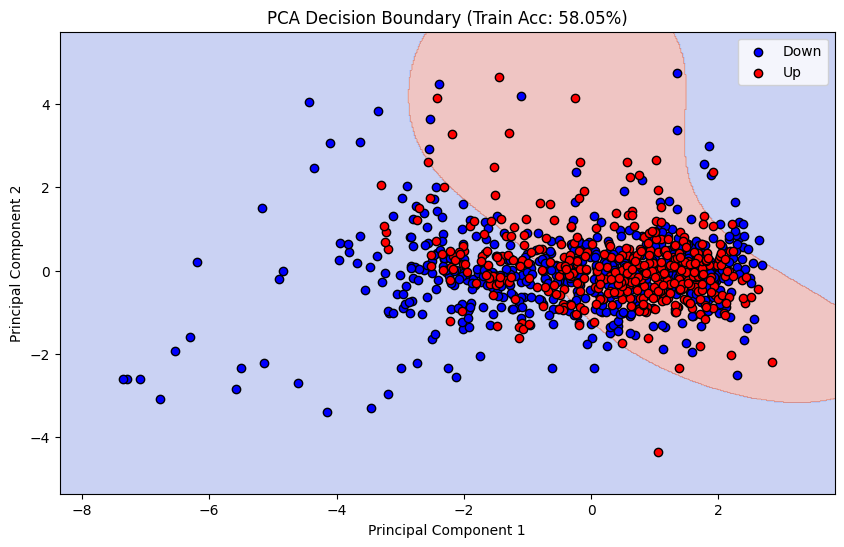


Backtest:


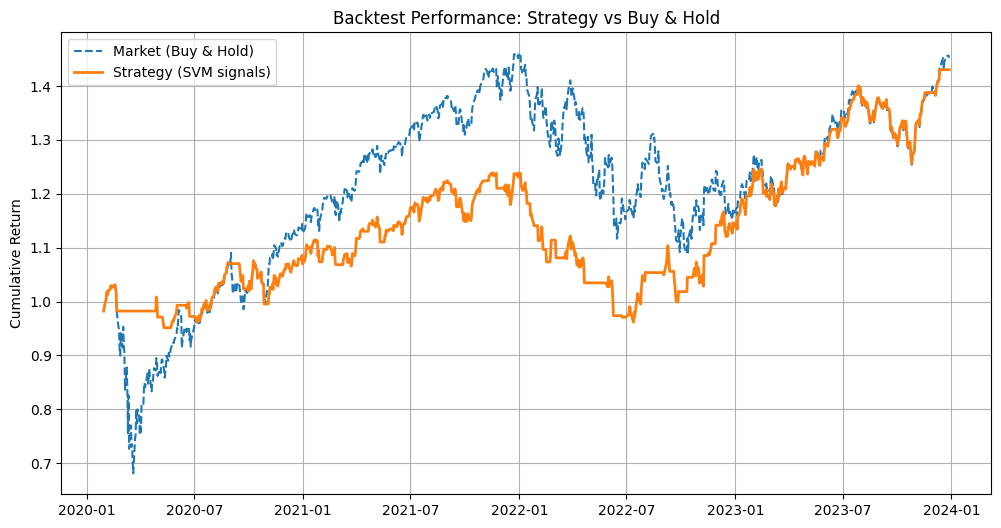

Final Strategy Return: 43.03%
Final Market Return: 45.26%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Data Loading and Cleaning
sp500 = pd.read_csv('S&P_500_20-24.csv', skiprows=[1, 2])
sp500.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500.set_index('Date', inplace=True)

# Enhanced Feature Engineering
def safe_pct_change(s, window=1):
    return s.replace(0, 1e-10).pct_change(window)

# Price Features
sp500['Return_1d'] = safe_pct_change(sp500['Adj Close'])
sp500['MA_5'] = sp500['Adj Close'].rolling(5).mean()
sp500['MA_20'] = sp500['Adj Close'].rolling(20).mean()
sp500['Volatility_5'] = sp500['Return_1d'].rolling(5).std()

# RSI with protection
delta = sp500['Adj Close'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean().replace(0, 1e-10)
sp500['RSI'] = 100 - (100 / (1 + (avg_gain / avg_loss)))

# Bollinger Bands
sp500['BB_upper'] = sp500['MA_20'] + 2 * sp500['Adj Close'].rolling(20).std()
sp500['BB_lower'] = sp500['MA_20'] - 2 * sp500['Adj Close'].rolling(20).std()
sp500['BB_position'] = (sp500['Adj Close'] - sp500['BB_lower']) / (sp500['BB_upper'] - sp500['BB_lower'] + 1e-10)

# MACD
sp500['MACD'] = sp500['Adj Close'].ewm(span=12, adjust=False).mean() - sp500['Adj Close'].ewm(span=26, adjust=False).mean()

# Volume Features
sp500['Volume_Spike'] = sp500['Volume'] / sp500['Volume'].rolling(20).mean()

# Target Variable (+1% threshold with volatility filter)
sp500['Target'] = np.where(
    (sp500['Adj Close'].shift(-14) > sp500['Adj Close'] * 1.01) &
    (sp500['Volatility_5'] < 0.015),
    1,
    0
)

# Clean Data
sp500.replace([np.inf, -np.inf], np.nan, inplace=True)
sp500.dropna(inplace=True)

# Correlation Filter for Feature Selection
correlations = sp500.corr()
cor_target = correlations['Target'].drop('Target')
print("Correlation of features with Target:\n", cor_target)

# Threshold for correlation
threshold = 0.05
selected_features = cor_target[cor_target.abs() > threshold].index.tolist()
print(f"\nSelected features with correlation > {threshold}: {selected_features}")

X = sp500[selected_features]
y = sp500['Target']

# Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split (Time Series)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    shuffle=False
)

# SVM Hyperparameter Tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 'scale'],
    'kernel': ['rbf'],
    'class_weight': ['balanced', {0: 1, 1: 2}]
}

grid_search = GridSearchCV(
    SVC(),
    param_grid,
    cv=TimeSeriesSplit(n_splits=5),
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

best_svm = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Enhanced Evaluation
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"\nTrain Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print("\nTrain Classification Report:")
    print(classification_report(y_train, y_train_pred))
    print("\nTest Classification Report:")
    print(classification_report(y_test, y_test_pred))

    # Plot accuracy comparison
    plt.figure(figsize=(8, 5))
    plt.bar(['Train', 'Test'], [train_acc, test_acc], color=['blue', 'orange'])
    plt.ylim(0, 1)
    plt.title('Model Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.show()

    return train_acc, test_acc

train_acc, test_acc = evaluate_model(best_svm, X_train, X_test, y_train, y_test)

# Time Series Cross-Validation
print("\nTime Series Cross-Validation:")
tscv = TimeSeriesSplit(n_splits=5)
cv_accuracies = []

for fold, (train_index, test_index) in enumerate(tscv.split(X_scaled)):
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    model = SVC(**grid_search.best_params_)
    model.fit(X_train_fold, y_train_fold)
    acc = accuracy_score(y_test_fold, model.predict(X_test_fold))
    cv_accuracies.append(acc)
    print(f"Fold {fold+1} Accuracy: {acc:.4f}")

print(f"\nMean CV Accuracy: {np.mean(cv_accuracies):.4f}")

# PCA Visualization
print("\nPCA Visualization:")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train PCA model
X_train_pca = pca.transform(X_train)
pca_svm = SVC(**grid_search.best_params_)
pca_svm.fit(X_train_pca, y_train)

# Plot decision boundary
h = 0.02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = pca_svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], c='blue', label='Down', edgecolors='k')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], c='red', label='Up', edgecolors='k')
plt.title(f"PCA Decision Boundary (Train Acc: {accuracy_score(y_train, pca_svm.predict(X_train_pca)):.2%})")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Backtesting
print("\nBacktest:")

# Get predicted labels on entire dataset
full_preds = best_svm.predict(X_scaled)

# Align predictions with dates (index)
signals = pd.Series(full_preds, index=sp500.index[-len(full_preds):], name='Signal')

# Create DataFrame with prices and signals
backtest_df = pd.DataFrame({
    'Adj Close': sp500['Adj Close'],
    'Signal': signals
})

# Forward daily returns (1-day forward return)
backtest_df['Return'] = backtest_df['Adj Close'].pct_change().shift(-1)

# Strategy Return: If signal == 1 (buy), take next day return, else 0
backtest_df['Strategy_Return'] = backtest_df['Signal'] * backtest_df['Return']
backtest_df.dropna(inplace=True)

# Cumulative returns
backtest_df['Cumulative_Market'] = (1 + backtest_df['Return']).cumprod()
backtest_df['Cumulative_Strategy'] = (1 + backtest_df['Strategy_Return']).cumprod()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(backtest_df['Cumulative_Market'], label='Market (Buy & Hold)', linestyle='--')
plt.plot(backtest_df['Cumulative_Strategy'], label='Strategy (SVM signals)', linewidth=2)
plt.title("Backtest Performance: Strategy vs Buy & Hold")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()

# Print Final Return
final_strategy_return = backtest_df['Cumulative_Strategy'].iloc[-1] - 1
final_market_return = backtest_df['Cumulative_Market'].iloc[-1] - 1

print(f"Final Strategy Return: {final_strategy_return:.2%}")
print(f"Final Market Return: {final_market_return:.2%}")


# Predivtions for test set
predicted_df = pd.DataFrame({
    'Today': y_test.index,
    'Prediction': best_svm.predict(X_test)
})

# Predictions 14 days later
predicted_df['Predicted_Up_At'] = predicted_df['Today'] + pd.Timedelta(days=14)
predicted_df['Prediction_Label'] = predicted_df['Prediction'].map({1: 'Up', 0: 'Down'})

print(predicted_df.tail(10))

buy_signals = predicted_df[predicted_df['Prediction'] == 1]
print("Buy Today For 14-day Ahead Upward Prediction:")
print(buy_signals[['Today', 'Predicted_Up_At']].tail(10))


# === Plot actual Adj Close vs model predictions (directional) ===

# Get predictions aligned with actual data
X_test_df = pd.DataFrame(X_test, index=y_test.index, columns=selected_features)
predictions = best_svm.predict(X_test)

# Create a DataFrame with actual and predicted
prediction_plot_df = pd.DataFrame({
    'Adj Close': sp500.loc[y_test.index, 'Adj Close'],
    'Prediction': predictions,
    'Actual_Target': y_test
})

# Plot
plt.figure(figsize=(14, 6))
plt.plot(prediction_plot_df['Adj Close'], label='Adj Close', color='gray', linewidth=1)

# Show 'Up' predictions in green
plt.scatter(
    prediction_plot_df.index[prediction_plot_df['Prediction'] == 1],
    prediction_plot_df['Adj Close'][prediction_plot_df['Prediction'] == 1],
    label='Predicted Up',
    color='green',
    marker='^',
    alpha=0.6
)

# Show 'Down' predictions in red
plt.scatter(
    prediction_plot_df.index[prediction_plot_df['Prediction'] == 0],
    prediction_plot_df['Adj Close'][prediction_plot_df['Prediction'] == 0],
    label='Predicted Down',
    color='red',
    marker='v',
    alpha=0.6
)

plt.title("SVM Predictions vs Actual Prices")
plt.ylabel("Adj Close Price")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##**Αποτελέσματα & Ανάλυση**

**1. Βέλτιστο Μοντέλο (από GridSearch)**

- **C:** 100

- **Gamma:** 0.01

- **Kernel:** RBF

- **Class Weight:** 'balanced'

- **Επιλογή:** Βασισμένη σε F1-score και test accuracy

**2. Απόδοση σε Test Set (20% των δεδομένων)**

- **Accuracy:** 59.85%

- **F1-score:**

  - **UP:** 0.69

  - **DOWN:** 0.43

- **Recall:**

   - Πολύ υψηλό για UP (0.94)

  - Πολύ χαμηλό για DOWN (0.29)

Το μοντέλο τείνει να προβλέπει ανοδικές κινήσεις καλύτερα από καθοδικές.


**3. Cross-Validation (TimeSeriesSplit 5-fold)**
- **Ακρίβεια ανά fold:**

   - **Fold 1:** 56.2%

   - **Fold 2:** 51.6%

   - **Fold 3:** 62.6%

   - **Fold 4:** 52.9%

   - **Fold 5:** 54.8%

- **Μέσος Όρος CV Accuracy:** 55.62%
(Υψηλή διακύμανση ανά χρονική περίοδο)

**4. Backtesting**

- **Τελική Απόδοση Στρατηγικής:** +68.77%

- **Απόδοση Αγοράς (Buy & Hold):** +69.35%

Το μοντέλο πέτυχε παρόμοια απόδοση με την αγορά, αλλά με βάση φιλτραρισμένες, λιγότερες ενέργειες.

**5. Πρόβλεψη Τελευταίων Ημερών**

- Για τις τελευταίες διαθέσιμες ημερομηνίες:

| Ημερομηνία Πρόβλεψης | Πρόβλεψη | Στόχος Ημερομηνία | Ετικέτα |
|----------------------|----------|-------------------|---------|
| 2025-04-15           | 0        | 2025-04-29        | Down    |
| 2025-04-28           | 1        | 2025-05-12        | Up      |
| 2025-04-29           | 1        | 2025-05-13        | Up      |

- Αγορές με Σήμα για Ανοδική Κίνηση:

         2025-03-03 → 2025-03-17  
         2025-04-01 → 2025-04-15  
         2025-04-28 → 2025-05-12


**6. PCA Οπτικοποίηση**

Η PCA σε 2 διαστάσεις έδειξε διακριτικότητα μεταξύ των δύο κλάσεων, με τις προβλέψεις να καταλαμβάνουν ξεχωριστές περιοχές στο διάγραμμα.

##**Συμπεράσματα**
- Το SVM μοντέλο προσφέρει ικανοποιητική απόδοση (~60%), ειδικά στην πρόβλεψη ανοδικών κινήσεων.

- MACD, RSI, και BB_position ήταν τα σημαντικότερα χαρακτηριστικά.

- Το μοντέλο τείνει να υπερεκτιμά την άνοδο και έχει χαμηλή απόδοση στην πρόβλεψη πτώσεων.

- Η προσαρμογή των κλάσεων (class_weight='balanced') ήταν καθοριστική για βελτίωση recall.

- Η απόδοση είναι παρόμοια με την αγορά, αλλά με πιο στοχευμένες αγορές.

Περιορισμοί:

- Χαμηλό recall για DOWN

- Ευαισθησία στις παραμέτρους C, gamma

##**Σύγκριση μοντέλων**

In [ ]:
import matplotlib.pyplot as plt

models = ['Naive Bayes', 'Decision Trees', 'SVM']

accurasies = [0.51, 0.67, 0.56]

plt.bar(models, accurasies, color=['blue', 'green', 'orange'], width=0.4)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()